In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D:\Social_Network_Ads.csv')
dataset.sample(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
120,15811613,Female,36,75000,0
154,15605327,Male,40,47000,0
325,15695679,Female,41,60000,0
215,15779529,Female,60,108000,1
140,15807909,Male,19,85000,0
101,15593014,Male,28,59000,0


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[-1]].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
   

In [5]:
X_train.shape

(300, 2)

In [6]:
y_train.shape

(300, 1)

In [7]:
X_test.shape

(100, 2)

In [8]:
y_test.shape

(100, 1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\MT\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [20]:
sample = np.array([[20, 18500]])
sample = scaler.transform(sample)
sample_pred = classifier.predict(sample)
sample_pred

array([0], dtype=int64)

In [21]:
y_actual = y_test.flatten()
y_actual

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [39]:
for i in range(len(y_actual)):
        print(f'Hasil aktual: {y_actual[i]} hasil prediksi: {y_pred[i]}')

Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 0 hasil prediksi: 0
Hasil aktual: 

No handles with labels found to put in legend.


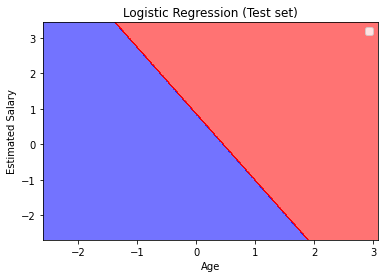

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.55, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#        c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [43]:
import numpy as np

X_set = np.arange(20).reshape(10, 2)
y_set = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


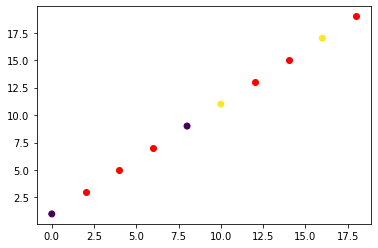

In [44]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('blue', 'red'))(i), label = j)